In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Combining  world and USA datasets

In [2]:
WAW1 = pd.read_pickle('World_Agro_WASDE.pkl')
WAW1.head(2)

,ReleaseDate,ForecastMonth,World_BS_Wheat,World_P_Wheat,World_D_Wheat,World_E_Wheat,Year_Month,World_BS_Coarse,World_P_Coarse,World_D_Coarse,...,World_ES_Corn,World_ES_Coarse,World_ES_Soyb,World_ES_Rice,World_P_All,World_BS_All,World_D_All,World_E_All,World_ES_All,World_S_All
0,2022-08-12,8.0,276.35,779.60,788.60,208.65,2022-08,338.30,1469.49,1476.15,...,306.68,331.64,104.27,178.52,3154.32,889.20,3161.74,660.85,881.78,2265.12
1,2022-07-12,7.0,280.10,771.64,784.22,205.47,2022-07,338.36,1477.20,1477.65,...,312.94,337.91,102.38,182.77,3155.00,893.83,3158.25,655.63,890.58,2261.17


In [3]:
WAW2 = pd.read_pickle('USA_Agro_WASDE.pkl')
WAW2.head(2)

,US_BS_Wheat,US_P_Wheat,US_D_Wheat,US_E_Wheat,Year_Month,US_BS_Coarse,US_P_Coarse,US_D_Coarse,US_E_Coarse,US_BS_Corn,...,US_ES_Corn,US_ES_Coarse,US_ES_Soyb,US_ES_Rice,US_P_All,US_BS_All,US_D_All,US_E_All,US_ES_All,US_S_All
0,17.96,48.52,30.43,22.45,2022-08,41.61,376.49,317.21,66.23,38.86,...,94.97,100.89,64.90,2.31,553.90,67.02,416.77,149.84,204.15,486.88
1,17.96,48.47,30.26,21.77,2022-07,41.11,382.76,318.33,68.39,38.35,...,97.66,105.54,63.97,2.27,559.38,66.25,417.68,150.78,207.95,493.13


In [4]:
World_USA_Agro_WASDE = pd.merge(WAW1, WAW2, on=('Year_Month'), how ='right')
World_USA_Agro_WASDE.head(3)

,ReleaseDate,ForecastMonth,World_BS_Wheat,World_P_Wheat,World_D_Wheat,World_E_Wheat,Year_Month,World_BS_Coarse,World_P_Coarse,World_D_Coarse,...,US_ES_Corn,US_ES_Coarse,US_ES_Soyb,US_ES_Rice,US_P_All,US_BS_All,US_D_All,US_E_All,US_ES_All,US_S_All
0,2022-08-12,8.0,276.35,779.60,788.60,208.65,2022-08,338.30,1469.49,1476.15,...,94.97,100.89,64.90,2.31,553.90,67.02,416.77,149.84,204.15,486.88
1,2022-07-12,7.0,280.10,771.64,784.22,205.47,2022-07,338.36,1477.20,1477.65,...,97.66,105.54,63.97,2.27,559.38,66.25,417.68,150.78,207.95,493.13
2,2022-06-10,6.0,279.40,773.43,785.99,204.59,2022-06,336.30,1479.19,1479.80,...,95.88,104.15,67.08,2.48,561.44,64.92,417.78,151.95,208.58,496.52


In [5]:
World_USA_Agro_WASDE.to_pickle('World_USA_Agro_WASDE.pkl')

# Preparing set for Dumbbell Chart

#### Collecting data of correlation between World and US volums VS inflation abjusted price

In [26]:
Column = ['World_BS_Wheat', 'World_P_Wheat', 'World_D_Wheat', 'World_E_Wheat', 'World_ES_Wheat',
          'World_P_All', 'World_BS_All', 'World_D_All', 'World_E_All', 'World_ES_All', 
          'US_BS_Wheat', 'US_P_Wheat', 'US_D_Wheat', 'US_E_Wheat', 'US_ES_Wheat', 
          'US_P_All','US_BS_All', 'US_D_All', 'US_E_All', 'US_ES_All', 'US_S_All']

In [34]:
# 
Cor_infl = {}
for i in Column:
    for j in Column:
        if i != j:
            Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW_infl'].corr(World_USA_Agro_WASDE[i]/World_USA_Agro_WASDE[j]): f"{i}/{j}"})

list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.6498 0.0032


In [35]:
li = [['Max', 'World vs US metrics i.*', round(max(list),4)],['Min', 'World vs US metrics i.*', round(min(list),4)]]
Max_Min_Corr_infl = pd.DataFrame(li, columns =['max_min', 'region', 'correlation'], dtype = float)
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032


#### Collecting data of correlation between World and US volums VS price

In [46]:

Cor_infl = {}
for i in Column:
    for j in Column:
        if i != j:
            Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW'].corr(World_USA_Agro_WASDE[i]/World_USA_Agro_WASDE[j]): f"{i}/{j}"})

list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.697 0.0004


In [47]:
li = [['Max', 'World vs US metrics', round(max(list),4)],['Min', 'World vs US metrics', round(min(list),4)]]
for i in range(len(li)):
    Max_Min_Corr_infl.loc[len(Max_Min_Corr_infl)] = li[i]
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032
2,Max,World vs US metrics,0.6970
3,Min,World vs US metrics,0.0004


#### Collecting data of correlation between World wheat volums VS inflation abjusted price

In [11]:
Column = ['World_BS_Wheat', 'World_P_Wheat', 'World_D_Wheat', 'World_E_Wheat', 'World_ES_Wheat']

In [12]:
Cor_infl = {}
for i in Column:
    Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW_infl'].corr(World_USA_Agro_WASDE[i]): f"{i}"})

list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.3502 0.1586


In [13]:
li = [['Max', 'World metrics i.*', round(max(list),4)],['Min', 'World metrics i.*', round(min(list),4)]]
for i in range(len(li)):
    Max_Min_Corr_infl.loc[len(Max_Min_Corr_infl)] = li[i]
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032
2,Max,World vs US metrics,0.6970
3,Min,World vs US metrics,0.0004
4,Max,World metrics i.*,0.3502
5,Min,World metrics i.*,0.1586


#### Collecting data of correlation between World wheat volums VS price

In [14]:
Cor_infl = {}
for i in Column:
    Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW'].corr(World_USA_Agro_WASDE[i]): f"{i}"})

list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.4708 0.2609


In [15]:
li = [['Max', 'World metrics', round(max(list),4)],['Min', 'World metrics', round(min(list),4)]]
for i in range(len(li)):
    Max_Min_Corr_infl.loc[len(Max_Min_Corr_infl)] = li[i]
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032
2,Max,World vs US metrics,0.6970
3,Min,World vs US metrics,0.0004
4,Max,World metrics i.*,0.3502
5,Min,World metrics i.*,0.1586
6,Max,World metrics,0.4708
7,Min,World metrics,0.2609


#### Collecting data of correlation between US wheat volums VS inflation abjusted price

In [16]:
Column = ['US_BS_Wheat', 'US_P_Wheat', 'US_D_Wheat', 'US_E_Wheat', 'US_ES_Wheat']

In [17]:
Cor_infl = {}
for i in Column:
    Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW_infl'].corr(World_USA_Agro_WASDE[i]): f"{i}"})
    
list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.4631 0.1028


In [18]:
li = [['Max', 'US metrics i.*', round(max(list),4)],['Min', 'US metrics i.*', round(min(list),4)]]
for i in range(len(li)):
    Max_Min_Corr_infl.loc[len(Max_Min_Corr_infl)] = li[i]
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032
2,Max,World vs US metrics,0.6970
3,Min,World vs US metrics,0.0004
4,Max,World metrics i.*,0.3502
5,Min,World metrics i.*,0.1586
6,Max,World metrics,0.4708
7,Min,World metrics,0.2609
8,Max,US metrics i.*,0.4631
9,Min,US metrics i.*,0.1028


#### Collecting data of correlation between US wheat volums VS price

In [19]:
Cor_infl = {}
for i in Column:
    Cor_infl.update({World_USA_Agro_WASDE['Ave_SRW'].corr(World_USA_Agro_WASDE[i]): f"{i}"})
    
list = []
for i in Cor_infl:
    if not np.isnan(i):
        list.append(abs(i))
list.sort()
print(round(max(list),4), round(min(list),4))

0.1441 0.0363


In [20]:
li = [['Max', 'US metrics', round(max(list),4)],['Min', 'US metrics', round(min(list),4)]]
for i in range(len(li)):
    Max_Min_Corr_infl.loc[len(Max_Min_Corr_infl)] = li[i]
Max_Min_Corr_infl

,max_min,region,correlation
0,Max,World vs US metrics i.*,0.6498
1,Min,World vs US metrics i.*,0.0032
2,Max,World vs US metrics,0.6970
3,Min,World vs US metrics,0.0004
4,Max,World metrics i.*,0.3502
5,Min,World metrics i.*,0.1586
6,Max,World metrics,0.4708
7,Min,World metrics,0.2609
8,Max,US metrics i.*,0.4631
9,Min,US metrics i.*,0.1028


C:\Users\Yuriy Podmogaev\AppData\Local\Temp\ipykernel_14264\62095702.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(correlations.index,       # Set labels again


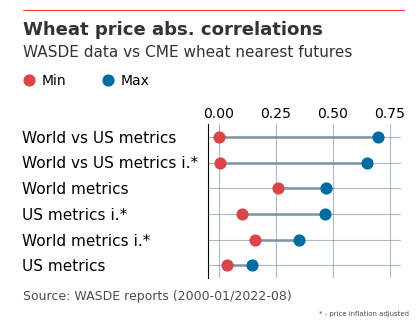

In [23]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(2.5,2))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Setup data
correlations = (Max_Min_Corr_infl
                .pivot(index='region',columns='max_min', values='correlation')
                .sort_values(by='Max'))


# Plot data
# Plot horizontal lines first
ax.hlines(y=correlations.index, xmin=correlations['Min'], xmax=correlations['Max'], 
          color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)

# Plot bubbles next
ax.scatter(correlations['Min'], correlations.index, label='Min', s=60, color='#DB444B', zorder=3)
ax.scatter(correlations['Max'], correlations.index, label='Max', s=60, color='#006BA2', zorder=3)

# Set xlim
ax.set_xlim(-0.05, 0.80)
ax.set_ylim(-0.5, 5.5)


# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=10,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(correlations.index,       # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=130,            # Pad tick labels so they don't go over y-axis
                         labelsize=11,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Set Legend
ax.legend(['Min', 'Max'], loc=(-1.02,1.20), ncol=2, frameon=False, handletextpad=-.1, handleheight=1)

# Add in line and tag
ax.plot([-0.615, 0.91],                      # Set width of line
        [1.45, 1.45],                        # Set height of line
        transform=fig.transFigure,           # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)

# Add in title and subtitle
ax.text(x=-0.615, y=1.325, s="Wheat price abs. correlations", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-0.615, y=1.215, s="WASDE data vs CME wheat nearest futures", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-0.615, y=-0.00, s="""Source: WASDE reports (2000-01/2022-08)""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.7)

# Set "*" text
ax.text(x=0.57, y=-0.08, s="""* - price inflation adjusted""", transform=fig.transFigure, ha='left', fontsize=5, alpha=.7)

# Export plot as high resolution PNG
plt.savefig('Wheat_price_correlation.png',    # Set path and filename
            dpi = 300,                          # Set dots per inch
            bbox_inches="tight",                # Remove extra whitespace around plot
            facecolor='white')                  # Set background color to white